<a href="https://colab.research.google.com/github/Hirpahuanca/DataScience/blob/main/004_IntroduccionProbabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Probabilidades usando Frecuencia relativa**:

______________________

Cnenzaremos con un ejemplo clásico y sencillo, lanzar una moneda con igual de probabilidad de cara y sello:

In [ ]:
#******************* EXPERIMENTO ALEATORIO DE LANZAR MONEDAS***********
#**********************************************************************
#Experimento probabilidad de dar clic a la pagina web
#***********************************************************************
#Se forma un espacio muestral
espacio1<-c("clic","no_clic")
#Lanzamos al azar la moneda
resultado<-sample(espacio1,1)
resultado


[1] "clic"

El resultado es aleatorio

Ahora veamos que pasa si el experimento se realiza 10 veces

In [ ]:
#Experimento probabilidad de dar clic a la página web - Repitiendo 10 veces
#***********************************************************************
espacio1<-c("clic","no_clic")
repeticiones<-10
resultado<-replicate(repeticiones,{sample(espacio1, 1)})
resultado


[1] "no_clic" "clic"    "clic"    "clic"    "clic"    "clic"    "no_clic"
 [8] "clic"    "no_clic" "no_clic"

Podemos resumir los resultados en una tabla de distribución de frecuencias y ver la probabilidad

In [ ]:
#Se obtiene los resultados
tabla<-table(resultado)
#Se crea las frecuencias relativas que serán igual a las probabilidades
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Resultado", "Frecuencia", "Probabilidad")
#Se imprime la tabla
print('Resultados con 10:')
tabla

[1] "Resultados con 10:"


Resultado,Frecuencia,Probabilidad
<fct>,<int>,<dbl>
clic,6,0.6
no_clic,4,0.4


Ahora repetimos el experimento 100 veces

In [ ]:
#Experimento probabilidad de dar clic a la página web - Repitiendo 100 veces
#***********************************************************************
espacio1<-c("clic","no_clic")
repeticiones<-100
resultado<-replicate(repeticiones,{sample(espacio1, 1)})
#Se obtiene los resultados
tabla<-table(resultado)
#Se crea las frecuencias relativas que serán igual a las probabilidades
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Resultado", "Frecuencia", "Probabilidad")
#Se imprime la tabla
print('Resultados con 100:')
tabla

[1] "Resultados con 100:"


Resultado,Frecuencia,Probabilidad
<fct>,<int>,<dbl>
clic,44,0.44
no_clic,56,0.56


Ahora vamos con 1000 veces

In [ ]:
#Experimento probabilidad de dar clic a la página web - Repitiendo 1000 veces
#***********************************************************************
espacio1<-c("clic","no_clic")
repeticiones<-1000
resultado<-replicate(repeticiones,{sample(espacio1, 1)})
#Se obtiene los resultados
tabla<-table(resultado)
#Se crea las frecuencias relativas que serán igual a las probabilidades
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Resultado", "Frecuencia", "Probabilidad")
#Se imprime la tabla
print('Resultados con 1000:')
tabla

[1] "Resultados con 1000:"


Resultado,Frecuencia,Probabilidad
<fct>,<int>,<dbl>
clic,516,0.516
no_clic,484,0.484


Ahora repetimos el experimento 1000 veces

In [ ]:
#Experimento probabilidad de dar clic a la página web - Repitiendo 100 000 veces
#***********************************************************************
espacio1<-c("clic","no_clic")
repeticiones<-100000
resultado<-replicate(repeticiones,{sample(espacio1, 1)})
#Se obtiene los resultados
tabla<-table(resultado)
#Se crea las frecuencias relativas que serán igual a las probabilidades
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Resultado", "Frecuencia", "Probabilidad")
#Se imprime la tabla
print('Resultados con 100 000:')
tabla

[1] "Resultados con 100 000:"


Resultado,Frecuencia,Probabilidad
<fct>,<int>,<dbl>
clic,50279,0.50279
no_clic,49721,0.49721


Se puede analizar que conforme se aumenta el número de frecuencias la probabilidad se estabilizará:

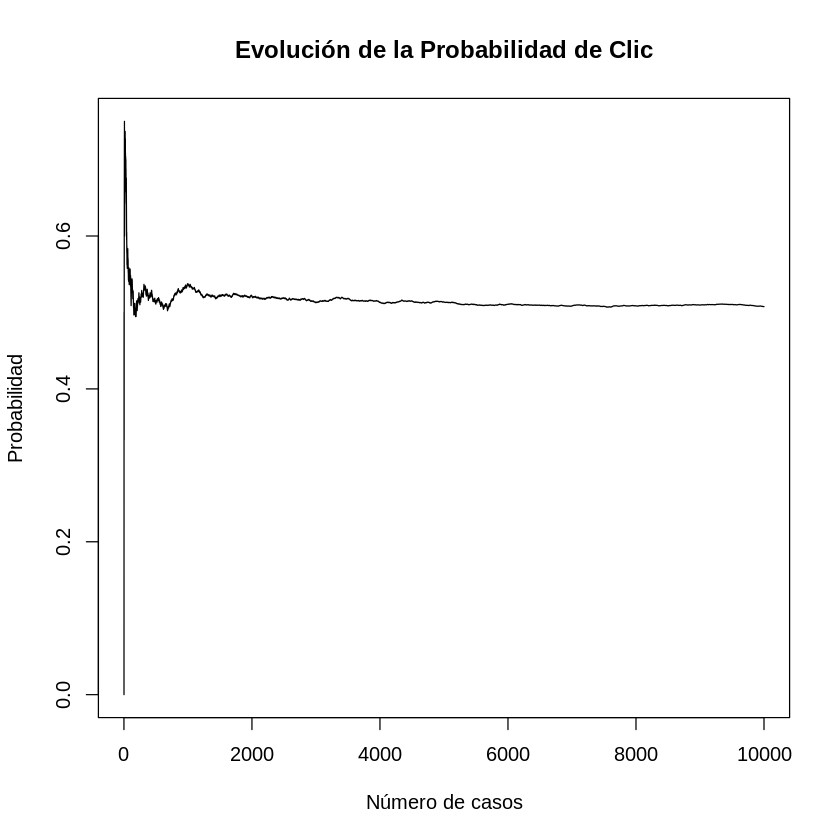

In [ ]:
# Crear un vector para almacenar el número acumulado de clics
resultados <- numeric(0)

# Crear un vector para almacenar las probabilidades calculadas
probabilidades <- numeric(0)

#Damos unos valores iniciales
resultados[1]<-0
probabilidades[1]<-0
# Iterar desde i = 2 hasta i = 10000
for (i in 2:10000) {
  # Generamos el resultado
  espacio1 <- c("clic", "no_clic")
  resultado <- sample(espacio1, 1)

  # Actualizamos el número acumulado de clics
  if (resultado == "clic") {
    resultados[i] <- resultados[i - 1] + 1
  } else {
    resultados[i] <- resultados[i - 1]
  }

  # Calculamos la probabilidad en esta iteración
  probabilidad <- resultados[i] / i

  # Almacenar la probabilidad en el vector de probabilidades
  probabilidades <- c(probabilidades, probabilidad)
}

# Graficar la evolución de la probabilidad
plot(1:10000, probabilidades, type = "l",
     xlab = "Número de casos", ylab = "Probabilidad",
     main = "Evolución de la Probabilidad de Clic")

Con poca data el resultado puede variar drasticamente, con mas datos se tiene resultados mas estables, la forma de calcular la probabilidades mediante la frecuencia relativa depende de la cantidad de los datos.

**SIMULACIONES PARA HALLAR PROBABILIDADES**

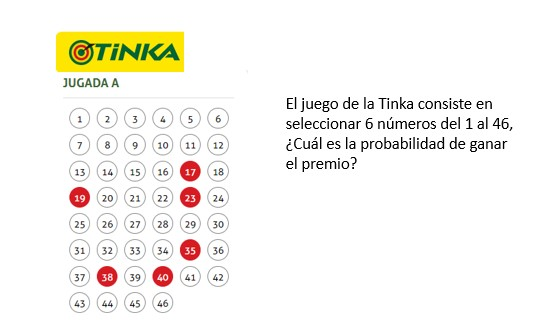

Comenecemos con la lógica del juego:

In [ ]:
#Simular una jugada
jugada<-sample(1:46,6,replace=FALSE)
jugada

[1]  6 17 21 32 23 15

In [ ]:
#simulando el resultado de la TINKA
sorteo<-sample(1:46,6,replace=FALSE)
sorteo

[1] 42 17 23 20 25 43

In [ ]:
#Validando si gane la TINKA
if(all(sort(jugada)==sort(sorteo))){
  resultado<-"gano"
}else{
  resultado<-"perdio"
}
resultado

[1] "perdio"

[1] "aciertos:"


[1] 1

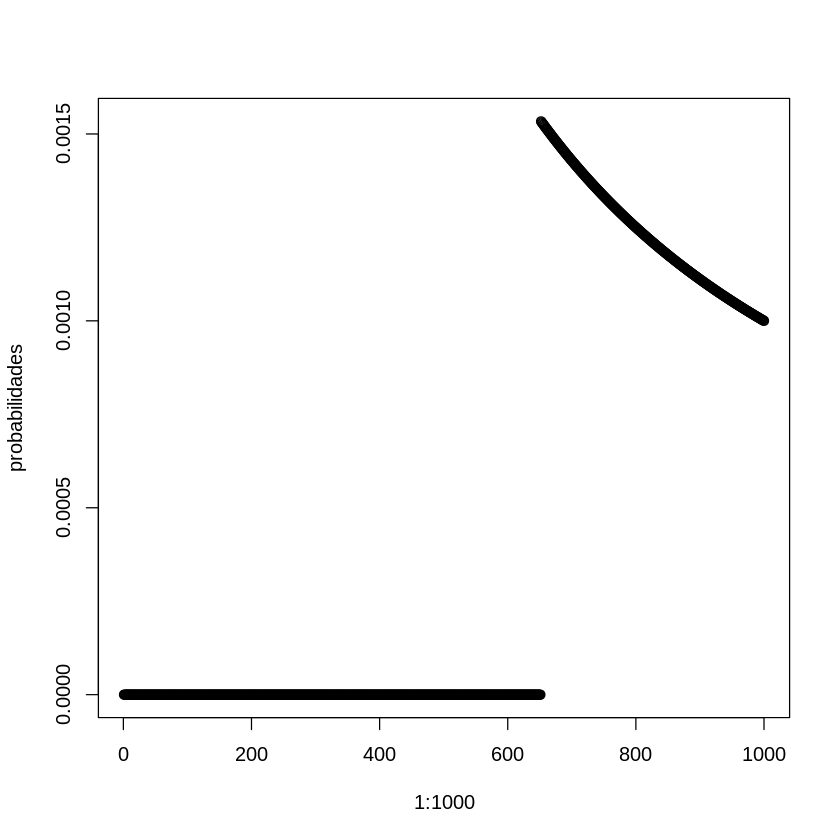

In [ ]:
#Formamos un vector para almacenar el numero de jugadas ganadas
resultados<-numeric(0)

#forma un vector para almacenar las probabilidades
probabilidades<-numeric(0)

#Damos resultados iniciales
resultados[1]<-0
probabilidades[1]<-0

for(i in 2:1000){
  jugada<-sample(1:46,2,replace = FALSE)
  sorteo<-sample(1:46,2,replace = FALSE)
  if(all(sort(jugada)==sort(sorteo))){
    resultado<-"gano"
  }else{
    resultado<-"perdio"
  }
  if(resultado=="gano"){
    resultados[i]<-resultados[i-1]+1
  }else{
    resultados[i]<-resultados[i-1]
  }
  probabilidad<-resultados[i]/i
  probabilidades[i]<-probabilidad
}

print("aciertos:")
resultados[1000]
plot(1:1000,probabilidades)

En las 1000 pruebas no se obtuvo resultao favorable, la probabilidad de que ocurra es casi cero.

**APLICACIÓN**:

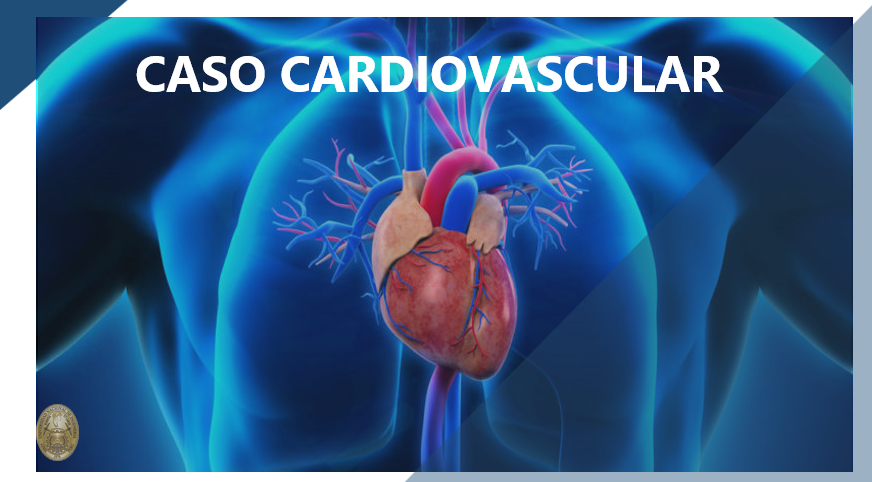

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. La insuficiencia cardíaca es un evento común causado por las enfermedades cardiovasculares y este conjunto de datos contiene 12 características que pueden usarse para predecir la mortalidad por insuficiencia cardíaca.

La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol mediante estrategias que abarquen a toda la población.

Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo anticipado que les pueda ser de ayuda.

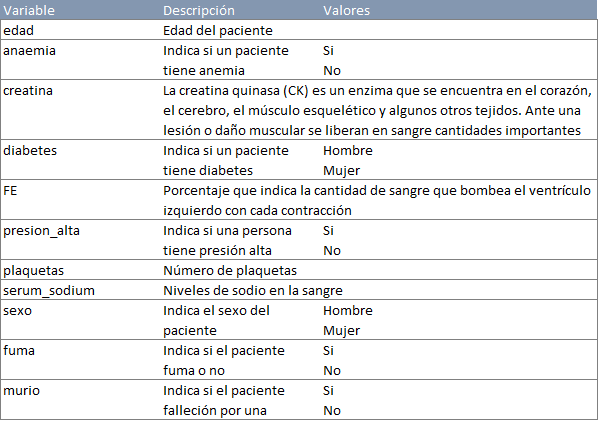

En la base: Si=1, No=0.

Hombre=0, Mujer=1.

Analizar mediante probabilidades cuáles serían factores de riesgo y hacer un ranking, las variables cuantitativas dicotomizarlas tomando como referencia su mediana.

In [ ]:
data<-read.csv("Enfermedad_Cardiovascular.csv", header=TRUE)

In [ ]:
head(data)

,edad,anemia,creatina,diabetes,F_E,presion_alta,plaquetas,serum_sodium,sexo,fuma,murio
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,130,0,0,1
2,55,0,7861,0,38,0,263358,136,0,0,1
3,65,0,146,0,20,0,162000,129,0,1,1
4,50,1,111,0,20,0,210000,137,0,0,1
5,65,1,160,1,20,0,327000,116,1,0,1
6,90,1,47,0,40,1,204000,132,0,1,1


In [ ]:
#Etiquetado,cambio de 1 y 0 por Si y No
data$anemia<-factor(data$anemia, levels=c(0,1), labels=c("No","Si"))
data$diabetes<-factor(data$diabetes,levels=c(0,1), labels=c("No","Si"))
data$presion_alta<-factor(data$presion_alta,levels=c(0,1), labels=c("No","Si"))
data$sexo<-factor(data$sexo,levels=c(0,1), labels=c("hombre","mujer"))
data$fuma<-factor(data$fuma,levels=c(0,1), labels=c("No","Si"))
data$murio<-factor(data$murio,levels=c(0,1), labels=c("No","Si"))
head(data)

,edad,anemia,creatina,diabetes,F_E,presion_alta,plaquetas,serum_sodium,sexo,fuma,murio
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,75,No,582,No,20,Si,265000,130,hombre,No,Si
2,55,No,7861,No,38,No,263358,136,hombre,No,Si
3,65,No,146,No,20,No,162000,129,hombre,Si,Si
4,50,Si,111,No,20,No,210000,137,hombre,No,Si
5,65,Si,160,Si,20,No,327000,116,mujer,No,Si
6,90,Si,47,No,40,Si,204000,132,hombre,Si,Si


**EDAD:**

In [ ]:
#Analizando las edades
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,299,60.83612,11.89481,60,60.21992,14.826,40,95,55,0.4182668,-0.2207925,0.6878946


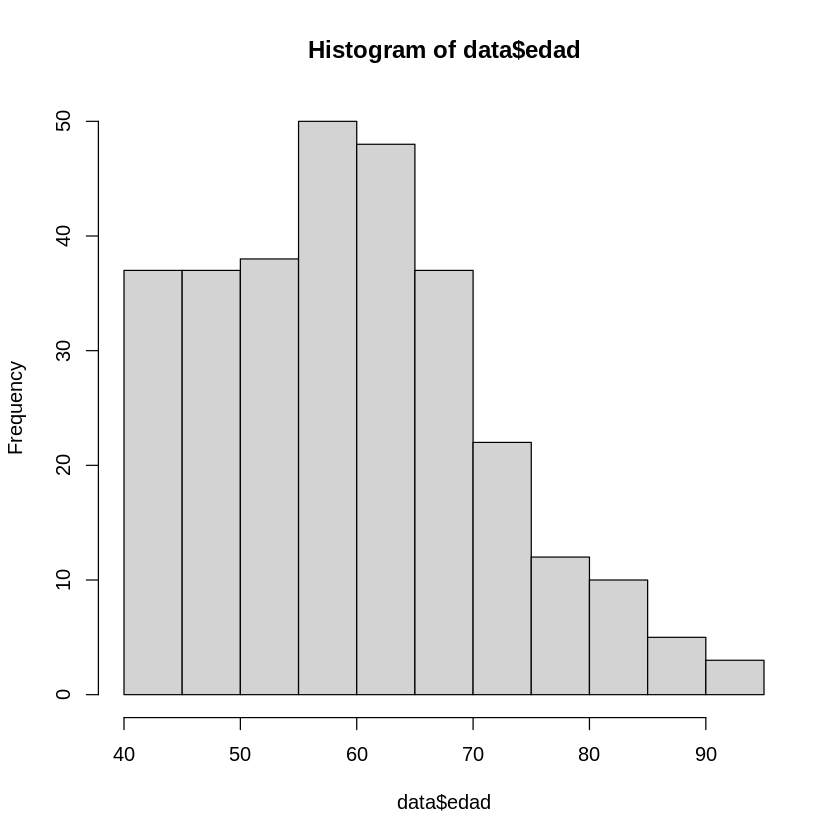

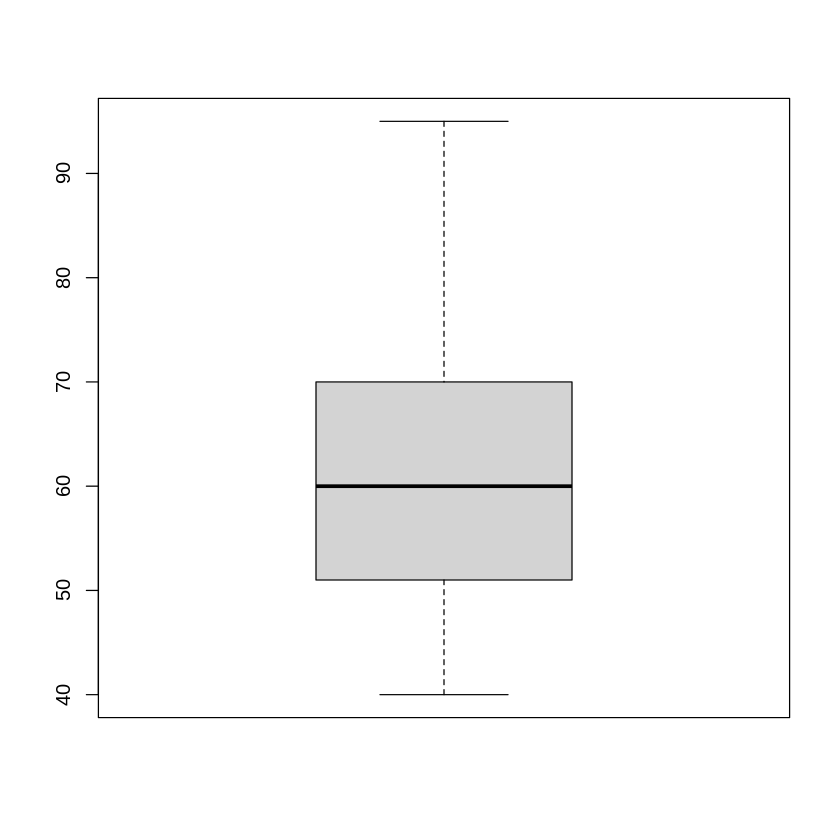

In [ ]:
library(psych)
describe(data$edad)
hist(data$edad)
boxplot(data$edad)

Dividiremos la data en dos grupos usando la mediana

---



In [ ]:
#categorizando la data numerica en dos grupos, por la mediana, creando nueva variable edadR
data$edadR[data$edad<60]<-0
data$edadR[data$edad>=60]<-1


In [ ]:
#etiquetas
data$edadR<-factor(data$edadR, levels=c(0,1),labels=c("Menos60","Mas60"))
head(data)

,edad,anemia,creatina,diabetes,F_E,presion_alta,plaquetas,serum_sodium,sexo,fuma,murio,edadR
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,75,No,582,No,20,Si,265000,130,hombre,No,Si,Mas60
2,55,No,7861,No,38,No,263358,136,hombre,No,Si,Menos60
3,65,No,146,No,20,No,162000,129,hombre,Si,Si,Mas60
4,50,Si,111,No,20,No,210000,137,hombre,No,Si,Menos60
5,65,Si,160,Si,20,No,327000,116,mujer,No,Si,Mas60
6,90,Si,47,No,40,Si,204000,132,hombre,Si,Si,Mas60


**CREATINA:**

In [ ]:
describe(data$creatina)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,299,581.8395,970.2879,250,365.4938,269.8332,23,7861,7838,4.41843,24.52541,56.1132


In [ ]:
data$creatinaR[data$creatina<250]<-0
data$creatinaR[data$creatina>=250]<-1
data$creatinaR<-factor(data$creatinaR,levels=c(0,1),labels=c("Baja","Alta"))
head(data)

,edad,anemia,creatina,diabetes,F_E,presion_alta,plaquetas,serum_sodium,sexo,fuma,murio,edadR,creatinaR
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,75,No,582,No,20,Si,265000,130,hombre,No,Si,Mas60,Alta
2,55,No,7861,No,38,No,263358,136,hombre,No,Si,Menos60,Alta
3,65,No,146,No,20,No,162000,129,hombre,Si,Si,Mas60,Baja
4,50,Si,111,No,20,No,210000,137,hombre,No,Si,Menos60,Baja
5,65,Si,160,Si,20,No,327000,116,mujer,No,Si,Mas60,Baja
6,90,Si,47,No,40,Si,204000,132,hombre,Si,Si,Mas60,Baja


**FE:**

In [ ]:
describe(data$F_E)


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,299,38.08361,11.83484,38,37.42739,11.8608,14,80,66,0.5498228,0.0005484328,0.6844265


In [ ]:
data$F_ER[data$F_E<38]<-0
data$F_ER[data$F_E>=38]<-1
data$F_ER<-factor(data$F_ER,levels=c(0,1),labels=c("Baja","Alta"))
head(data)

,edad,anemia,creatina,diabetes,F_E,presion_alta,plaquetas,serum_sodium,sexo,fuma,murio,edadR,creatinaR,F_ER
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,75,No,582,No,20,Si,265000,130,hombre,No,Si,Mas60,Alta,Baja
2,55,No,7861,No,38,No,263358,136,hombre,No,Si,Menos60,Alta,Alta
3,65,No,146,No,20,No,162000,129,hombre,Si,Si,Mas60,Baja,Baja
4,50,Si,111,No,20,No,210000,137,hombre,No,Si,Menos60,Baja,Baja
5,65,Si,160,Si,20,No,327000,116,mujer,No,Si,Mas60,Baja,Baja
6,90,Si,47,No,40,Si,204000,132,hombre,Si,Si,Mas60,Baja,Alta


**PLAQUETAS**

In [ ]:
describe(data$plaquetas)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,299,263358,97804.24,262000,256730.1,65234.4,25100,850000,824900,1.447682,6.025232,5656.165


In [ ]:
data$plaquetasR[data$plaquetas<262000]<-0
data$plaquetasR[data$plaquetas>=262000]<-1
data$plaquetasR<-factor(data$plaquetasR,levels=c(0,1),labels=c("Baja","Alta"))
head(data)

,edad,anemia,creatina,diabetes,F_E,presion_alta,plaquetas,serum_sodium,sexo,fuma,murio,edadR,creatinaR,F_ER,plaquetasR
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,75,No,582,No,20,Si,265000,130,hombre,No,Si,Mas60,Alta,Baja,Alta
2,55,No,7861,No,38,No,263358,136,hombre,No,Si,Menos60,Alta,Alta,Alta
3,65,No,146,No,20,No,162000,129,hombre,Si,Si,Mas60,Baja,Baja,Baja
4,50,Si,111,No,20,No,210000,137,hombre,No,Si,Menos60,Baja,Baja,Baja
5,65,Si,160,Si,20,No,327000,116,mujer,No,Si,Mas60,Baja,Baja,Alta
6,90,Si,47,No,40,Si,204000,132,hombre,Si,Si,Mas60,Baja,Alta,Baja


**SERUM**

In [ ]:
describe(data$serum_sodium)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,299,136.6254,4.412477,137,136.8216,4.4478,113,148,35,-1.037643,3.98419,0.2551802


In [ ]:
data$serum_sodiumR[data$serum_sodium<137]<-0
data$serum_sodiumR[data$serum_sodium>=137]<-1
data$serum_sodiumR<-factor(data$serum_sodiumR,levels=c(0,1),labels=c("Baja","Alta"))
head(data)

,edad,anemia,creatina,diabetes,F_E,presion_alta,plaquetas,serum_sodium,sexo,fuma,murio,edadR,creatinaR,F_ER,plaquetasR,serum_sodiumR
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,75,No,582,No,20,Si,265000,130,hombre,No,Si,Mas60,Alta,Baja,Alta,Baja
2,55,No,7861,No,38,No,263358,136,hombre,No,Si,Menos60,Alta,Alta,Alta,Baja
3,65,No,146,No,20,No,162000,129,hombre,Si,Si,Mas60,Baja,Baja,Baja,Baja
4,50,Si,111,No,20,No,210000,137,hombre,No,Si,Menos60,Baja,Baja,Baja,Alta
5,65,Si,160,Si,20,No,327000,116,mujer,No,Si,Mas60,Baja,Baja,Alta,Baja
6,90,Si,47,No,40,Si,204000,132,hombre,Si,Si,Mas60,Baja,Alta,Baja,Baja


**Calculando las probabilidades**

In [ ]:
#contabilizar las unidades
#EDAD
#probabilidad que la persona muera dado que sea menor de 60 = probabilidad(muera y tenga menos de 60)/probabilidad que tenga menos de 60
#probabilidad que la persona muera dado que sea menor de 60 = P(A)/P(B)
#P(A)=probabilidad de que una persona muera y tenga menos de 60= cantidad de que mueren y tenian menos de 60/cantidad de casos totales
#P(B)=probabilidad que tengan menos de 60 = cantidad de casos menos de 60/ cantidad total de casos

Prob_Muere_dado_Menos60<-sum(data$murio=="Si"& data$edadR == "Menos60")/sum(data$edadR=="Menos60")
Prob_Muere_dado_Mas60<-sum(data$murio=="Si"& data$edadR == "Mas60")/sum(data$edadR=="Mas60")
Prob_Muere_dado_Menos60
Prob_Muere_dado_Mas60


[1] 0.2403101

[1] 0.3823529

In [ ]:
#incremento del factor de riesgo
Indice=Prob_Muere_dado_Mas60/Prob_Muere_dado_Menos60
Indice  #el factor incrementa en un 0.591

[1] 1.591082

In [ ]:
#ANEMIA
Prob_Muere_NoAnemina<-sum(data$murio=="Si" & data$anemia=="No")/sum(data$anemia=="No")
Prob_Muere_SiAnemina<-sum(data$murio=="Si" & data$anemia=="Si")/sum(data$anemia=="Si")
Prob_Muere_NoAnemina
Prob_Muere_SiAnemina
Indice=Prob_Muere_SiAnemina/Prob_Muere_NoAnemina
Indice #el factor se incrementa en un 0.21

[1] 0.2941176

[1] 0.3565891

[1] 1.212403

In [ ]:
#CREATINA
Prob_Muere_dado_BajaCreatina<-sum(data$murio=="Si" & data$creatinaR =="Baja")/sum(data$creatinaR =="Baja")
Prob_Muere_dado_AltaCreatina<-sum(data$murio=="Si" & data$creatinaR=="Alta")/sum(data$creatinaR=="Alta")
Prob_Muere_dado_BajaCreatina
Prob_Muere_dado_AltaCreatina
Indice = Prob_Muere_dado_AltaCreatina/Prob_Muere_dado_BajaCreatina
Indice #el factor se incrementa en un 0.0797

[1] 0.3087248

[1] 0.3333333

[1] 1.07971

In [ ]:
#DIABETES
Prob_Muere_dado_No<-sum(data$murio=="Si" & data$diabetes =="No")/sum(data$diabetes =="No")
Prob_Muere_dado_Si<-sum(data$murio=="Si" & data$diabetes =="Si")/sum(data$diabetes =="Si")
Prob_Muere_dado_No
Prob_Muere_dado_Si
Indice=Prob_Muere_dado_Si/Prob_Muere_dado_No
Indice  #el factor se incrementa en un


[1] 0.3218391

[1] 0.32

[1] 0.9942857

In [ ]:
#PRESION ALTA
Prob_Muere_dado_No<-sum(data$murio=="Si" & data$presion_alta =="No")/sum(data$presion_alta =="No")
Prob_Muere_dado_Si<-sum(data$murio=="Si" & data$presion_alta =="Si")/sum(data$presion_alta =="Si")
Prob_Muere_dado_No
Prob_Muere_dado_Si
Indice=Prob_Muere_dado_Si/Prob_Muere_dado_No
Indice #el factor se incrementa en un 0.264

[1] 0.2938144

[1] 0.3714286

[1] 1.26416

In [ ]:
#FUMA
Prob_Muere_dado_No<-sum(data$murio=="Si" & data$fuma =="No")/sum(data$fuma =="No")
Prob_Muere_dado_Si<-sum(data$murio=="Si" & data$fuma =="Si")/sum(data$fuma =="Si")
Prob_Muere_dado_No
Prob_Muere_dado_Si
Indice=Prob_Muere_dado_Si/Prob_Muere_dado_No
Indice #el factor se incrementa en un

[1] 0.3251232

[1] 0.3125

[1] 0.9611742

In [ ]:
#F_E
Prob_Muere_dado_Baja<-sum(data$murio=="Si" & data$F_ER =="Baja")/sum(data$F_ER =="Baja")
Prob_Muere_dado_Alta<-sum(data$murio=="Si" & data$F_ER =="Alta")/sum(data$F_ER =="Alta")
Prob_Muere_dado_Baja
Prob_Muere_dado_Alta
Indice=Prob_Muere_dado_Baja/Prob_Muere_dado_Alta  # mayor probabilidad/ menor probabilidad
Indice #el factor se incrementa en un 0.6875


[1] 0.4084507

[1] 0.2420382

[1] 1.687546

In [ ]:
#PLAQUETAS
Prob_Muere_dado_Baja<-sum(data$murio=="Si" & data$plaquetasR =="Baja")/sum(data$plaquetasR =="Baja")
Prob_Muere_dado_Alta<-sum(data$murio=="Si" & data$plaquetasR =="Alta")/sum(data$plaquetasR =="Alta")
Prob_Muere_dado_Baja
Prob_Muere_dado_Alta
Indice=Prob_Muere_dado_Baja/Prob_Muere_dado_Alta  # mayor probabilidad/ menor probabilidad
Indice #el factor se incrementa en un 0.02

[1] 0.3243243

[1] 0.3178808

[1] 1.02027

In [ ]:
#SERUM
Prob_Muere_dado_Baja<-sum(data$murio=="Si" & data$serum_sodiumR =="Baja")/sum(data$serum_sodiumR =="Baja")
Prob_Muere_dado_Alta<-sum(data$murio=="Si" & data$serum_sodiumR =="Alta")/sum(data$serum_sodiumR =="Alta")
Prob_Muere_dado_Baja
Prob_Muere_dado_Alta
Indice=Prob_Muere_dado_Baja/Prob_Muere_dado_Alta  # mayor probabilidad/ menor probabilidad
Indice #el factor se incrementa en un 0.8355


[1] 0.4244604

[1] 0.23125

[1] 1.835505

In [ ]:
#SEXO
Prob_Muere_dado_hombre<-sum(data$murio=="Si" & data$sexo =="hombre")/sum(data$sexo =="hombre")
Prob_Muere_dado_mujer<-sum(data$murio=="Si" & data$sexo =="mujer")/sum(data$sexo =="mujer")
Prob_Muere_dado_hombre
Prob_Muere_dado_mujer
Indice=Prob_Muere_dado_mujer/Prob_Muere_dado_hombre
Indice #el factor se incrementa en un 0.01

[1] 0.3195876

[1] 0.3238095

[1] 1.01321

La variable que mayor impacto es el Serum, el segundo es el FE y la edad, las variables que no tiene un impacto significativo son el sexo, diabetes